# 파생변수 통합본

In [166]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
from scipy.stats import percentileofscore
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set the font to AppleGothic to display Korean characters on macOS
plt.rcParams["font.family"] = "NanumGothic Eco"
plt.rcParams["axes.unicode_minus"] = False  
pd.options.display.max_rows = 20

In [167]:
data=pd.read_csv("/home/piai/preprocessed_product.csv",encoding="euc-kr")
member_data=pd.read_csv("/home/piai/preprocessed_member.csv",encoding="euc-kr")

# 프로모션 변수

In [168]:
promotion=pd.read_csv("/home/piai/promotion.csv",encoding="euc-kr")


In [169]:
# 프로모션 회원번호 리스트 생성
promotion_ids = promotion['회원번호'].unique()

# 프로모션여부 컬럼을 생성하고 기본값을 0으로 설정
member_data['프로모션여부'] = 0

# promotion_ids에 해당하는 회원번호는 1로 설정
member_data.loc[member_data['회원번호'].isin(promotion_ids), '프로모션여부'] = 1

# 결과 확인
print(member_data)


             회원번호 조합원상태 성별  연령 배송서비스신청여부 모바일알람여부 Gold_member   주소대분류 주소소분류  \
0      1000012800  정상회원  여  58       미신청     미수신      normal  용인 수지구  풍덕천동   
1      1000103744  정상회원  여  34       미신청     미수신      normal  용인 처인구   고림동   
2      1000122304  정상회원  여  38       미신청     미수신      normal      광주    기타   
3      1000163136  정상회원  여  73       미신청     미수신      normal  용인 수지구   동천동   
4      1000281920  정상회원  여  42        신청     미수신      normal  용인 수지구  풍덕천동   
...           ...   ... ..  ..       ...     ...         ...     ...   ...   
11547   999682432    탈퇴  여  47       미신청     미수신      normal  용인 수지구   동천동   
11548   999721408  정상회원  여  43       미신청     미수신      normal  용인 수지구   동천동   
11549   999738112  정상회원  여  67       미신청     미수신      normal  용인 수지구   성복동   
11550   999754816  정상회원  여  44        신청     미수신      normal  용인 수지구   상현동   
11551    99995712  정상회원  여  66       미신청     미수신      normal  용인 수지구   상현동   

       프로모션여부  
0           0  
1           0  
2           0  

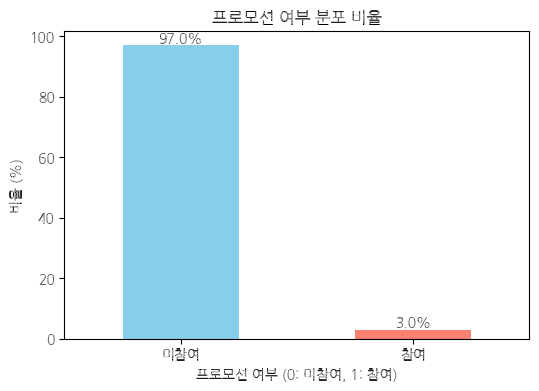

In [170]:

# 프로모션 여부 값의 분포 비율 계산
promotion_ratio = member_data['프로모션여부'].value_counts(normalize=True) * 100

# 막대 그래프 생성
plt.figure(figsize=(6, 4))
promotion_ratio.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('프로모션 여부 분포 비율')
plt.xlabel('프로모션 여부 (0: 미참여, 1: 참여)')
plt.ylabel('비율 (%)')
plt.xticks(ticks=[0, 1], labels=['미참여', '참여'], rotation=0)

# 각 막대 위에 비율 값 표시
for i, v in enumerate(promotion_ratio):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center')

plt.show()

# 계절변수

In [171]:
# 계절 분류 함수 정의
def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

# 공급월을 기반으로 계절 열 추가
data['계절'] = data['공급월'].apply(get_season)

print(data)

              회원번호 조합원상태  물품대분류 물품중분류     물품소분류                  물품명  구매수량  \
0        272369856  정상회원     과실    과일        사과          사과/유(1.5kg)   1.0   
1       1476143616  정상회원     간식     빵  식빵, 식사대용      아침빵(240g/8개)/매장   1.0   
2        743192512  정상회원     채소  양념채소        생강             생강(300g)   1.0   
3        176912064  정상회원    축산물   유제품    우유/산양유  유기농저지방우유(종이팩/900ml)   1.0   
4         87592064  정상회원  양념/가루    가루      양념가루        카레(매운맛: 100g)   3.0   
...            ...   ...    ...   ...       ...                  ...   ...   
288884  1110819712  정상회원     채소  뿌리채소         무         무(0.7~1kg미만)   1.0   
288885  1517953728  정상회원     채소  양념채소        쪽파             쪽파(500g)   1.0   
288886   713691392  정상회원     반찬   밑반찬        조림       우엉조림(반찬용/150g)   1.0   
288887   247926336  정상회원     간식     빵     건강곡물빵       감자바게트(180g)/매장   1.0   
288888   748292800  정상회원     채소  뿌리채소         무             무(1kg이상)   1.0   

           구매금액 구매매장   구매시각  ...  공급월  공급일  성별    연령  배송서비스신청여부

# 요일변수

In [172]:
data['날짜'] = pd.to_datetime(data.rename(columns={'공급년도': 'year', '공급월': 'month', '공급일': 'day'})[['year', 'month', 'day']])

# 요일 추출 (한글 약어로 요일 표시)
data['요일'] = data['날짜'].dt.strftime('%a').map({
    'Mon': '월', 'Tue': '화', 'Wed': '수', 'Thu': '목', 'Fri': '금', 'Sat': '토', 'Sun': '일'
})

# 결과 확인
print(data[['공급년도', '공급월', '공급일', '요일']])

        공급년도  공급월  공급일 요일
0       2023    1    6  금
1       2023    1    6  금
2       2023    1    6  금
3       2023    1    6  금
4       2023    1    6  금
...      ...  ...  ... ..
288884  2023   11    4  토
288885  2023   11    4  토
288886  2023   11    4  토
288887  2023   11    4  토
288888  2023   11    4  토

[288889 rows x 4 columns]


# 연령대

In [173]:
# 연령대 구간 설정 및 파생 변수 생성
member_data['연령대'] = pd.cut(member_data['연령'], 
                      bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 110], 
                     labels=['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대이상'],
                     right=False)

print(member_data[['연령', '연령대']])

# 연령대 구간 설정 및 파생 변수 생성
data['연령대'] = pd.cut(data['연령'], 
                        bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 110], 
                        labels=['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대이상'],
                        right=False)

# 결과 확인
print(data[['연령', '연령대']])


       연령  연령대
0      58  50대
1      34  30대
2      38  30대
3      73  70대
4      42  40대
...    ..  ...
11547  47  40대
11548  43  40대
11549  67  60대
11550  44  40대
11551  66  60대

[11552 rows x 2 columns]
          연령  연령대
0       45.0  40대
1       34.0  30대
2       51.0  50대
3       69.0  60대
4       73.0  70대
...      ...  ...
288884  50.0  50대
288885  44.0  40대
288886  49.0  40대
288887  63.0  60대
288888  58.0  50대

[288889 rows x 2 columns]


# 구매시간대

In [174]:
# 1. 구매시각을 datetime 형식으로 변환 (시간만 추출)
data['구매시'] = pd.to_datetime(data['구매시각'], format='%H:%M').dt.hour

# 2. 구매시간대를 구간별로 나누어 파생 변수 생성
data['구매시간대'] = pd.cut(data['구매시'], 
                        bins=[8, 11, 14, 18, 21], 
                        labels=['8~11시', '11~14시', '14~18시', '18~21시'],
                        right=False)
# 3. '구매시' 열 드롭
data = data.drop(columns=['구매시'])
print(data[['구매시각', '구매시간대']])

         구매시각   구매시간대
0       10:04   8~11시
1       10:09   8~11시
2       10:12   8~11시
3       10:23   8~11시
4       10:29   8~11시
...       ...     ...
288884  13:26  11~14시
288885  10:58   8~11시
288886  14:36  14~18시
288887  16:23  14~18시
288888  16:51  14~18시

[288889 rows x 2 columns]


# RFM 

## Recency

In [175]:
# 2. 기준 날짜 설정 (2023년 11월 4일)
reference_date = pd.to_datetime("2023-11-04")

# 3. 각 회원번호별 가장 최근 구매일 찾기 (날짜 형식 변환 포함)
data['날짜'] = pd.to_datetime(data['날짜'], errors='coerce')  # 날짜 형식으로 변환
recent_purchase = data.groupby('회원번호')['날짜'].max().reset_index()

# 4. Recency 계산 (기준 날짜와 각 회원의 가장 최근 구매일 간의 일 차이)
recent_purchase['R'] = (reference_date - recent_purchase['날짜']).dt.days

# 5. 원본 데이터에 Recency 열 추가 (회원번호 기준 병합)
data = data.merge(recent_purchase[['회원번호', 'R']], on='회원번호', how='left')

# 결과 확인
print(data[['회원번호', '날짜', 'R']])

              회원번호         날짜    R
0        272369856 2023-01-06   11
1       1476143616 2023-01-06   55
2        743192512 2023-01-06  250
3        176912064 2023-01-06    2
4         87592064 2023-01-06    0
...            ...        ...  ...
288884  1110819712 2023-11-04    0
288885  1517953728 2023-11-04    0
288886   713691392 2023-11-04    0
288887   247926336 2023-11-04    0
288888   748292800 2023-11-04    0

[288889 rows x 3 columns]


## Frequency

In [176]:


# 1. '회원번호'와 '구매일' 기준으로 중복 제거
unique_visits = data[['회원번호', '날짜']].drop_duplicates()

# 2. 회원번호별 구매 빈도 계산
frequency = unique_visits.groupby('회원번호').size().reset_index(name='F')

# 3. 원본 데이터에 Frequency 병합 (원하는 경우)
data = data.merge(frequency, on='회원번호', how='left')

# 결과 확인
print(data[['회원번호', 'F']])



              회원번호   F
0        272369856  75
1       1476143616  11
2        743192512  12
3        176912064  92
4         87592064  47
...            ...  ..
288884  1110819712  49
288885  1517953728  20
288886   713691392  37
288887   247926336  12
288888   748292800  74

[288889 rows x 2 columns]


## Monetary

In [177]:
# 회원번호별 누적 구매금액 계산
monetary = data.groupby('회원번호')['구매금액'].sum().reset_index(name='M')

# 원본 데이터에 누적금액(Monetary) 병합 (필요한 경우)
data = data.merge(monetary, on='회원번호', how='left')

# 결과 확인
print(data[['회원번호', 'M']])

              회원번호          M
0        272369856  1505970.0
1       1476143616   144730.0
2        743192512   436583.0
3        176912064  1973350.0
4         87592064  1420890.0
...            ...        ...
288884  1110819712  1014353.0
288885  1517953728   359908.0
288886   713691392  1211918.0
288887   247926336   424133.0
288888   748292800  2272026.0

[288889 rows x 2 columns]


In [178]:
# 회원번호별로 첫 번째 R, F, M 값만 선택하여 중복 제거
data_unique = data.drop_duplicates(subset='회원번호', keep='first')

# 중복 제거 후 member_data와 병합
member_data = member_data.merge(data_unique[['회원번호', 'R', 'F', 'M']], on='회원번호', how='left')


In [179]:
member_data.isnull().sum()

회원번호            0
조합원상태           0
성별              0
연령              0
배송서비스신청여부       0
모바일알람여부         0
Gold_member     0
주소대분류           0
주소소분류           0
프로모션여부          0
연령대             0
R              12
F              12
M              12
dtype: int64

In [180]:
member_data = member_data.dropna(subset=['R', 'F', 'M'])
member_data.isnull().sum()

회원번호           0
조합원상태          0
성별             0
연령             0
배송서비스신청여부      0
모바일알람여부        0
Gold_member    0
주소대분류          0
주소소분류          0
프로모션여부         0
연령대            0
R              0
F              0
M              0
dtype: int64

In [181]:
member_data['Gold_member'].value_counts()

normal    11335
VIP         205
Name: Gold_member, dtype: int64

VIP와 Normal의 비율:
normal    98.22357
VIP        1.77643
Name: Gold_member, dtype: float64


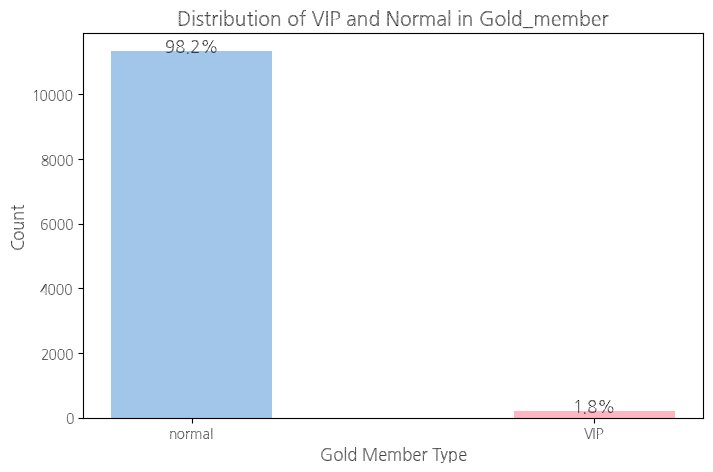

In [182]:
# VIP와 Normal 비율 계산
vip_normal_ratio = member_data['Gold_member'].value_counts(normalize=True) * 100

# 결과 출력
print("VIP와 Normal의 비율:")
print(vip_normal_ratio)

# VIP와 Normal 개수 계산
vip_normal_counts = member_data['Gold_member'].value_counts()

# 히스토그램 생성
plt.figure(figsize=(8, 5))
bars = plt.bar(
    vip_normal_counts.index, 
    vip_normal_counts.values, 
    color=['#A1C6EA', '#FFB6C1'],  # 파스텔 블루와 핑크 색상
    width=0.4
)

# 바 위에 비율 텍스트 표시
for bar, ratio in zip(bars, vip_normal_ratio):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x 위치
        bar.get_height() + 0.2,             # y 위치 (바 높이 위)
        f'{ratio:.1f}%',                    # 비율 텍스트
        ha='center',                        # 텍스트 정렬
        fontsize=12                          # 텍스트 크기
    )

plt.xlabel("Gold Member Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of VIP and Normal in Gold_member", fontsize=14)
plt.show()

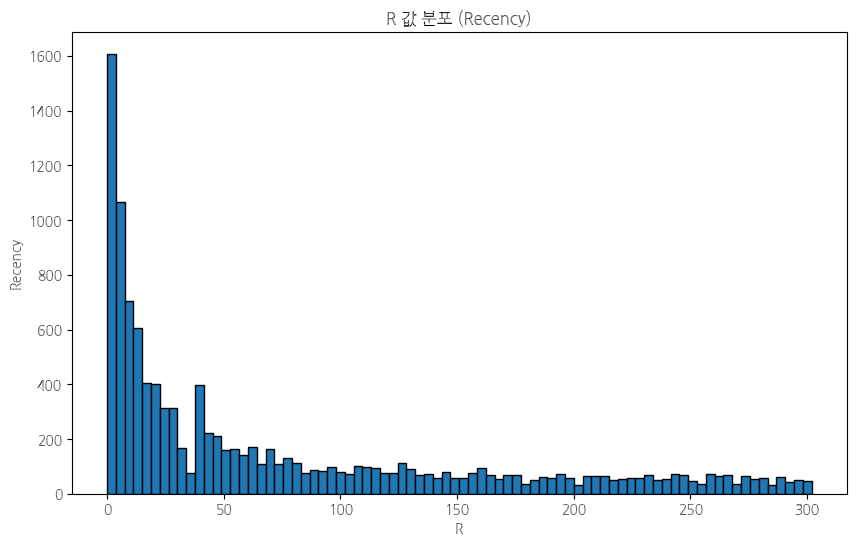

In [183]:
# 히스토그램을 이용한 R의 분포 시각화
plt.figure(figsize=(10, 6))
plt.hist(member_data['R'], bins=80, edgecolor='black')
plt.title('R 값 분포 (Recency)')
plt.xlabel('R')
plt.ylabel('Recency')
plt.show()


In [184]:
# R 값에 따라 R_score 매기기
def assign_r_score(r):
    if 0 <= r < 15:
        return 5
    elif 15 <= r < 50:
        return 4
    elif  50 <= r < 110:
        return 3
    elif 110 <= r < 200:
        return 2
    else:
        return 1

# R 값에 따라 R_score 열 생성
member_data['R_score'] = member_data['R'].apply(assign_r_score)

# 결과 확인 
print(member_data[['R', 'R_score']])

           R  R_score
0      139.0        2
1       18.0        4
2        0.0        5
3        0.0        5
4       25.0        4
...      ...      ...
11547  296.0        1
11548   40.0        4
11549   13.0        5
11550    9.0        5
11551    5.0        5

[11540 rows x 2 columns]


In [185]:
r_score_percentages = member_data['R_score'].value_counts(normalize=True) * 100

print("\nR_score 구간별 비율:")
print(r_score_percentages)


R_score 구간별 비율:
5    33.214905
4    22.972270
3    16.178510
2    14.670711
1    12.963605
Name: R_score, dtype: float64


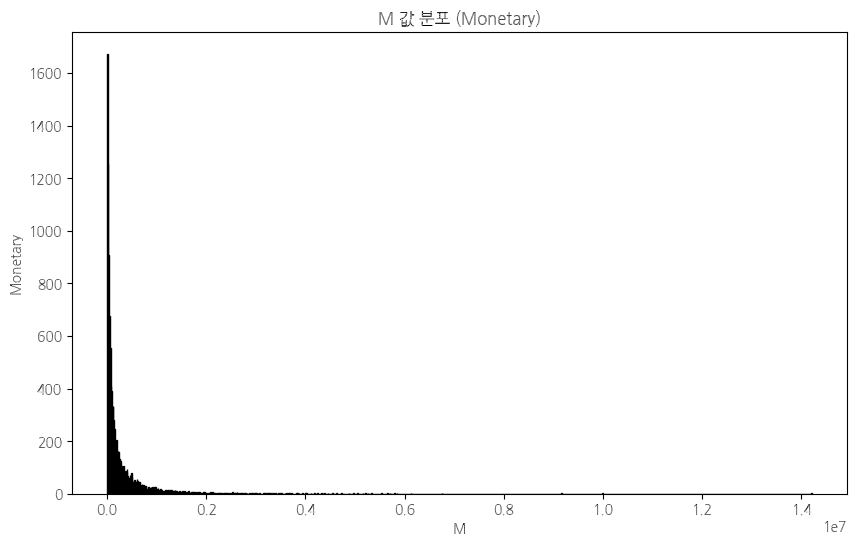

In [186]:
plt.figure(figsize=(10, 6))
plt.hist(member_data['M'], bins=1000, edgecolor='black')
plt.title('M 값 분포 (Monetary)')
plt.xlabel('M')
plt.ylabel('Monetary')
plt.show()


In [187]:
member_data = member_data.sort_values(by='M').reset_index(drop=True)

# 총 합을 5등분한 목표값 계산
target_sum = member_data['M'].sum() / 5

# 그룹을 나누는 변수 초기화
member_data['M_score'] = 0
current_sum = 0
group = 1

# 그룹 나누기
for i in range(len(member_data)):
    current_sum += member_data.loc[i, 'M']
    member_data.loc[i, 'M_score'] = group
    # 그룹의 합이 목표값 이상에 도달하면 그룹을 변경
    if current_sum >= target_sum and group < 5:
        group += 1
        current_sum = 0

In [188]:
m_score_percentages = member_data['M_score'].value_counts(normalize=True) * 100

print("\nM_score 구간별 비율:")
print(m_score_percentages)


M_score 구간별 비율:
1    73.318891
2    13.596187
3     7.175043
4     4.055459
5     1.854419
Name: M_score, dtype: float64


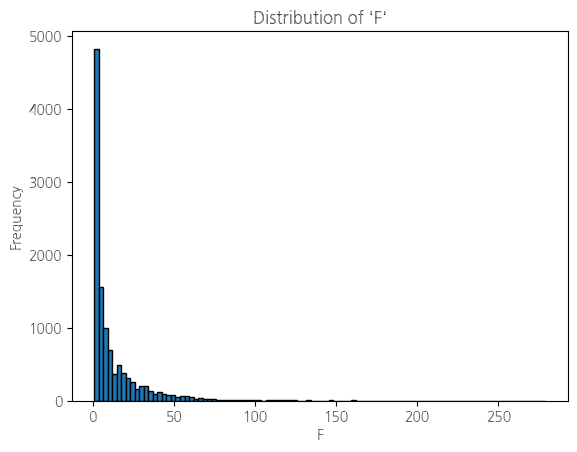

In [189]:
# F 열 히스토그램
plt.hist(member_data['F'], bins=100, edgecolor='black')
plt.title("Distribution of 'F'")
plt.xlabel("F")
plt.ylabel("Frequency")
plt.show()

In [190]:
member_data['F_score'] = 0

# 1회 구매자에게 1점 할당
member_data.loc[member_data['F'] == 1, 'F_score'] = 1

# 남은 고객들에 대해 평균 기준으로 반복적으로 그룹화하여 점수 할당
remaining_data = member_data[member_data['F_score'] == 0].copy()  # 아직 점수가 없는 데이터만
score = 2  # 2점부터 시작

while not remaining_data.empty and score <= 5:
    # 남은 고객들 빈도 평균 계산
    mean_frequency = remaining_data['F'].mean()
    
    # 평균보다 낮은 그룹에 점수 할당
    member_data.loc[(member_data['F_score'] == 0) & (member_data['F'] <= mean_frequency), 'F_score'] = score
    
    # 다음 점수를 위해 업데이트
    remaining_data = member_data[member_data['F_score'] == 0].copy()
    score += 1

# 남아 있는 고객들에게 5점 할당
member_data.loc[member_data['F_score'] == 0, 'F_score'] = 5



In [191]:
f_score_percentages = member_data['F_score'].value_counts(normalize=True) * 100

print("\nF_score 구간별 비율:")
print(f_score_percentages)


F_score 구간별 비율:
2    51.724437
1    24.081456
3    15.883882
4     5.545927
5     2.764298
Name: F_score, dtype: float64


In [192]:
# R, F, M 점수에 가중치를 적용하여 RFM_score 계산
member_data['RFM_score'] = member_data['R_score'].astype(float) * 0.3 + member_data['F_score'].astype(float) * 0.4 + member_data['M_score'].astype(float) * 0.3


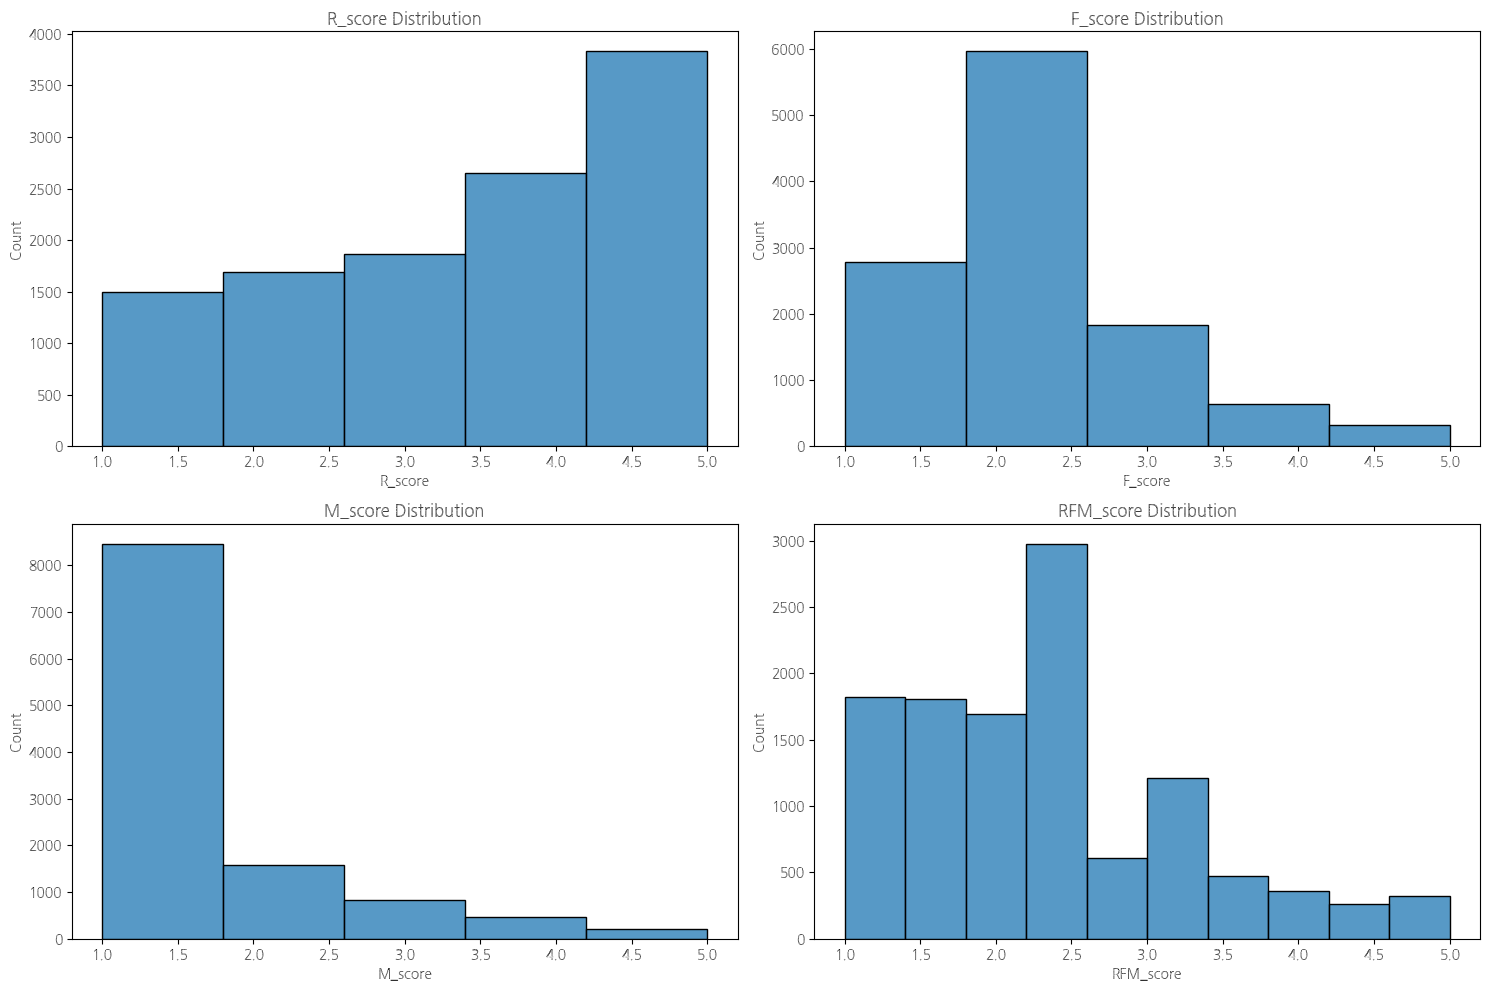

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

# 플롯 사이즈 설정
plt.figure(figsize=(15, 10))

# R_score 분포
plt.subplot(2, 2, 1)
sns.histplot(member_data['R_score'], bins=5, kde=False)
plt.title('R_score Distribution')

# F_score 분포
plt.subplot(2, 2, 2)
sns.histplot(member_data['F_score'], bins=5, kde=False)
plt.title('F_score Distribution')

# M_score 분포
plt.subplot(2, 2, 3)
sns.histplot(member_data['M_score'], bins=5, kde=False)
plt.title('M_score Distribution')

# RFM_score 분포
plt.subplot(2, 2, 4)
sns.histplot(member_data['RFM_score'], bins=10, kde=False)
plt.title('RFM_score Distribution')

# 전체 플롯 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()


In [194]:
# RFM_grade별 비율 계산
rfm_grade_percentages = member_data['RFM_score'].value_counts(normalize=True) * 100

# 결과 출력
rfm_grade_percentages = rfm_grade_percentages.sort_index()  # 등급 순서대로 정렬
print("RFM_score 등급별 비율:")
print(rfm_grade_percentages)




RFM_score 등급별 비율:
1.0    9.280763
1.3    0.017331
1.3    6.507799
1.4    3.578856
1.6    4.237435
         ...   
4.3    1.949740
4.4    0.294627
4.6    0.363951
4.7    1.048527
5.0    1.377816
Name: RFM_score, Length: 43, dtype: float64


In [195]:
# RFM_score을 기준으로 높은 점수부터 등급 구간 나누기
member_data['RFM_rank'] = pd.qcut(member_data['RFM_score'].rank(method="first", ascending=False), 
                           q=[0, 0.05, 0.15, 0.35, 0.65, 1.0], 
                           labels=['포미킹', '포미패밀리', '포미프렌즈', '포미초대손님', '포미방문자'])

# 결과 확인
print(member_data[['RFM_score', 'RFM_rank']])


       RFM_score RFM_rank
0            1.0    포미방문자
1            1.9    포미방문자
2            1.0    포미방문자
3            1.6    포미방문자
4            1.0    포미방문자
...          ...      ...
11535        5.0      포미킹
11536        5.0      포미킹
11537        5.0      포미킹
11538        5.0      포미킹
11539        5.0      포미킹

[11540 rows x 2 columns]


In [196]:

# RFM_rank 등급별 비율 계산
rfm_grade_percentages = member_data['RFM_rank'].value_counts(normalize=True) * 100
rfm_grade_percentages = rfm_grade_percentages.sort_index()
print(rfm_grade_percentages)


포미킹        5.0
포미패밀리     10.0
포미프렌즈     20.0
포미초대손님    30.0
포미방문자     35.0
Name: RFM_rank, dtype: float64


In [197]:
# RFM_rank 별 총 누적 구매 금액과 인원수 계산
rfm_rank_stats = member_data.groupby('RFM_rank').agg(
    총_누적금액=('M', 'sum'),      # 각 RFM_rank의 총 누적 구매 금액
    인원수=('회원번호', 'count')   # 각 RFM_rank의 인원수
)

# 전체 누적 구매 금액 계산
total_cumulative_amount = rfm_rank_stats['총_누적금액'].sum()

# 비율 계산 (각 RFM_rank의 누적 금액 / 전체 누적 금액 * 100)
rfm_rank_stats['총누적금액'] = (rfm_rank_stats['총_누적금액'] / 1_000_0).astype(float)
rfm_rank_stats['누적금액_비율(%)'] = (rfm_rank_stats['총_누적금액'] / total_cumulative_amount * 100).round(2)

# 결과 확인
print(rfm_rank_stats[['총누적금액', '인원수', '누적금액_비율(%)']])

                  총누적금액   인원수  누적금액_비율(%)
RFM_rank                                 
포미킹       115760.447176   577       34.72
포미패밀리      86243.365800  1154       25.87
포미프렌즈      71955.409100  2308       21.58
포미초대손님     41597.364229  3462       12.48
포미방문자      17819.309100  4039        5.35


# 최애매장

In [198]:
# 고객별로 가장 많이 구매한 매장 찾기
favorite_store = (
    data.groupby(['회원번호', '구매매장'])
    .size()
    .reset_index(name='구매횟수')
    .sort_values(['회원번호', '구매횟수'], ascending=[True, False])
    .drop_duplicates(subset='회원번호')
)

# 주 매장을 member_data에 병합하여 추가
member_data = member_data.merge(favorite_store[['회원번호', '구매매장']], on='회원번호', how='left')
member_data = member_data.rename(columns={'구매매장': '주매장'})

# 결과 확인
print(member_data)

             회원번호 조합원상태 성별  연령 배송서비스신청여부 모바일알람여부 Gold_member   주소대분류 주소소분류  \
0      1127956160  정상회원  여  43       미신청     미수신      normal  용인 수지구   죽전동   
1       848958528  정상회원  여  46       미신청      수신      normal  성남 분당구   구미동   
2       975105280  정상회원  남  40       미신청     미수신      normal  용인 기흥구   신갈동   
3        96200192  정상회원  여  48       미신청     미수신      normal  용인 수지구   상현동   
4       715408192  정상회원  여  38       미신청     미수신      normal  서울 강남구    기타   
...           ...   ... ..  ..       ...     ...         ...     ...   ...   
11535   762476352  정상회원  여  50       미신청      수신         VIP  용인 수지구   신봉동   
11536   193003584  정상회원  여  64       미신청     미수신         VIP  용인 수지구   성복동   
11537   381879424  정상회원  여  52       미신청      수신         VIP  용인 수지구  풍덕천동   
11538   436681536  정상회원  여  51       미신청      수신         VIP  용인 수지구  풍덕천동   
11539  1670400000    탈퇴  남  36       미신청      수신      normal      기타    기타   

       프로모션여부  연령대      R      F           M  R_score  M_score 

# 이탈여부 & 재구매여부

In [199]:
# '이탈여부' 컬럼 생성
member_data['이탈여부'] = member_data['R'].apply(lambda x: '잠재이탈' if x >= 150 else '정상')


In [200]:
member_data['이탈여부'].value_counts()

정상      9220
잠재이탈    2320
Name: 이탈여부, dtype: int64

In [201]:

# 날짜 열을 날짜 형식으로 변환
data['날짜'] = pd.to_datetime(data['날짜'])

# 1. 같은 날 중복 방문 제거
unique_visits = data.drop_duplicates(subset=['회원번호', '날짜'])

# 2. 각 회원번호별 구매일 기준 정렬 및 구매일차이 구하기
unique_visits = unique_visits.sort_values(by=['회원번호', '날짜'])
unique_visits['구매일차이'] = unique_visits.groupby('회원번호')['날짜'].diff().dt.days

# 3. 각 회원번호별 평균 재구매 주기 및 최소 재구매 주기 계산
average_repurchase_cycle = unique_visits.groupby('회원번호').agg(
    최소재구매주기=('구매일차이', 'min')
).fillna(0).reset_index()

# member_data에 평균재구매주기와 최소재구매주기 열 추가 (회원번호 기준 병합)
member_data = member_data.merge(average_repurchase_cycle, on='회원번호', how='left')

# 결과 확인
print(member_data)


             회원번호 조합원상태 성별  연령 배송서비스신청여부 모바일알람여부 Gold_member   주소대분류 주소소분류  \
0      1127956160  정상회원  여  43       미신청     미수신      normal  용인 수지구   죽전동   
1       848958528  정상회원  여  46       미신청      수신      normal  성남 분당구   구미동   
2       975105280  정상회원  남  40       미신청     미수신      normal  용인 기흥구   신갈동   
3        96200192  정상회원  여  48       미신청     미수신      normal  용인 수지구   상현동   
4       715408192  정상회원  여  38       미신청     미수신      normal  서울 강남구    기타   
...           ...   ... ..  ..       ...     ...         ...     ...   ...   
11535   762476352  정상회원  여  50       미신청      수신         VIP  용인 수지구   신봉동   
11536   193003584  정상회원  여  64       미신청     미수신         VIP  용인 수지구   성복동   
11537   381879424  정상회원  여  52       미신청      수신         VIP  용인 수지구  풍덕천동   
11538   436681536  정상회원  여  51       미신청      수신         VIP  용인 수지구  풍덕천동   
11539  1670400000    탈퇴  남  36       미신청      수신      normal      기타    기타   

       프로모션여부  ...      F           M  R_score  M_score  F_scor

In [202]:
member_data['재구매여부'] = member_data['최소재구매주기'].apply(lambda x: 1 if 0 < x <= 14 else 0)

# 결과 확인
print(member_data)

             회원번호 조합원상태 성별  연령 배송서비스신청여부 모바일알람여부 Gold_member   주소대분류 주소소분류  \
0      1127956160  정상회원  여  43       미신청     미수신      normal  용인 수지구   죽전동   
1       848958528  정상회원  여  46       미신청      수신      normal  성남 분당구   구미동   
2       975105280  정상회원  남  40       미신청     미수신      normal  용인 기흥구   신갈동   
3        96200192  정상회원  여  48       미신청     미수신      normal  용인 수지구   상현동   
4       715408192  정상회원  여  38       미신청     미수신      normal  서울 강남구    기타   
...           ...   ... ..  ..       ...     ...         ...     ...   ...   
11535   762476352  정상회원  여  50       미신청      수신         VIP  용인 수지구   신봉동   
11536   193003584  정상회원  여  64       미신청     미수신         VIP  용인 수지구   성복동   
11537   381879424  정상회원  여  52       미신청      수신         VIP  용인 수지구  풍덕천동   
11538   436681536  정상회원  여  51       미신청      수신         VIP  용인 수지구  풍덕천동   
11539  1670400000    탈퇴  남  36       미신청      수신      normal      기타    기타   

       프로모션여부  ...           M  R_score  M_score  F_score  RFM_

In [203]:
# 재구매여부가 1인 고객 수
repurchase_count = member_data['재구매여부'].sum()

# 전체 고객 수
total_customers = len(member_data)

# 구매주기 내 재구매율 계산
repurchase_rate = (repurchase_count / total_customers) * 100

# 결과 출력
print(f"구매주기 내 재구매율: {repurchase_rate:.2f}%")

구매주기 내 재구매율: 57.48%


In [208]:
# '5개월이내재구매' 컬럼 생성
member_data['5개월이내재구매'] = member_data.apply(
    lambda row: 1 if row['재구매여부'] == 1 and row['이탈여부'] == '정상' else 0,
    axis=1
)

In [209]:
# 5개월 이내 재구매율 계산
total_count = member_data['5개월이내재구매'].count()
repurchase_count = member_data['5개월이내재구매'].sum()
repurchase_rate = (repurchase_count / total_count) * 100

# 재구매율 출력
print(f"5개월 이내 재구매율: {repurchase_rate:.2f}%")

5개월 이내 재구매율: 53.69%


In [205]:
# 조합원상태가 '탈퇴'인 경우 이탈여부를 '이탈'로 설정
member_data.loc[member_data['조합원상태'] == '탈퇴', '이탈여부'] = '이탈'


In [206]:
# 이탈과 잠재이탈 합산하여 이탈률 계산
total_count = member_data['이탈여부'].count()
churn_count = member_data['이탈여부'].value_counts().get('이탈', 0) + member_data['이탈여부'].value_counts().get('잠재이탈', 0)
churn_rate = (churn_count / total_count) * 100

# 이탈률 출력
print(f"이탈률: {churn_rate:.2f}%")


이탈률: 20.57%


In [207]:
data.to_csv("RFM_product.csv",encoding='euc-kr',index=False)
member_data.to_csv("RFM_member.csv",encoding='euc-kr',index=False) 